In [1]:
import plio.io.io_spectral_profiler
from libpysat.examples import get_path
import pandas as pd

from libpysat.spectral.spectra import *
from libpysat.utils.utils import *
from libpysat.spectral.continuum import lincorr

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/krodriguez/anaconda3/envs/libpysat/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rand']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
figsize(20,10)

# Open a spectral profiler and load it into a Spectra object

In [3]:
s = Spectra.from_spectral_profiler(get_path('SP_2C_02_02358_S138_E3586.spc'))
s.head(10)

,,512.6,518.4,524.7,530.4,536.5,542.8000000000001,548.7,554.5,560.5,566.7,...,CALIBRATION,SP_PELTIER,TC_MI_STATUS,CLOCK_COUNT_ERR_FLAG,SPATIAL_RESOLUTION_FLAG,GEOMETRIC_INFO_RECAL_FLAG,SUPPORT_IMAGE_LINE_POSITION,SUPPORT_IMAGE_COLUMN_POSITION,THUMBNAIL_LINE_POSITION,THUMBNAIL_COLUMN_POSITION
minor,id,,,,,,,,,,,,,,,,,,,,,
RAW,0,5123.0000,5887.0000,6375.0000,6806.0000,7494.0000,7585.0000,7525.0000,7860.0000,8582.0000,9196.0000,...,0,1,1,0,65,67,27,480,13,228
REF1,0,0.0402,0.0487,0.0497,0.0520,0.0532,0.0551,0.0559,0.0571,0.0594,0.0612,...,0,1,1,0,65,67,27,480,13,228
REF2,0,0.0397,0.0482,0.0492,0.0515,0.0527,0.0545,0.0553,0.0565,0.0588,0.0605,...,0,1,1,0,65,67,27,480,13,228
QA,0,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,...,0,1,1,0,65,67,27,480,13,228
RAW,1,5164.0000,5955.0000,6461.0000,6905.0000,7614.0000,7709.0000,7642.0000,7986.0000,8730.0000,9366.0000,...,0,1,1,0,65,67,55,480,27,228
REF1,1,0.0414,0.0502,0.0513,0.0537,0.0549,0.0568,0.0576,0.0588,0.0612,0.0631,...,0,1,1,0,65,67,55,480,27,228
REF2,1,0.0409,0.0497,0.0507,0.0531,0.0544,0.0562,0.0570,0.0582,0.0606,0.0624,...,0,1,1,0,65,67,55,480,27,228
QA,1,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,...,0,1,1,0,65,67,55,480,27,228
RAW,2,5080.0000,5820.0000,6296.0000,6711.0000,7375.0000,7473.0000,7416.0000,7741.0000,8445.0000,9038.0000,...,0,1,1,0,65,67,83,480,40,228


# View the metadata

In [4]:
# View the metadata.  Usage: <spectra object>.loc(<row filter>, s.metadata)
s.meta.head()

,,CALIBRATION,CENTER_LATITUDE,CENTER_LONGITUDE,CLOCK_COUNT_ERR_FLAG,DPU_TEMPERATURE,EMISSION_ANGLE,GEOMETRIC_INFO_RECAL_FLAG,HALOGEN_BULB_RADIANCE,HALOGEN_BULB_TEMPERATURE1,HALOGEN_BULB_TEMPERATURE2,...,SP_POWER_P5V,SP_TEMPERATURE,SUB_SPACECRAFT_LATITUDE,SUB_SPACECRAFT_LONGITUDE,SUPPORT_IMAGE_COLUMN_POSITION,SUPPORT_IMAGE_LINE_POSITION,TC_MI_STATUS,THUMBNAIL_COLUMN_POSITION,THUMBNAIL_LINE_POSITION,VIS_FOCAL_PLANE_TEMPERATURE
minor,id,,,,,,,,,,,,,,,,,,,,,
RAW,0,0,-13.488591,358.607848,0,14.2704,0.607720,67,4.759,10.36,10.36,...,4.9735,20.808901,-13.517322,358.600799,480,27,1,228,13,21.059999
REF1,0,0,-13.488591,358.607848,0,14.2704,0.607720,67,4.759,10.36,10.36,...,4.9735,20.808901,-13.517322,358.600799,480,27,1,228,13,21.059999
REF2,0,0,-13.488591,358.607848,0,14.2704,0.607720,67,4.759,10.36,10.36,...,4.9735,20.808901,-13.517322,358.600799,480,27,1,228,13,21.059999
QA,0,0,-13.488591,358.607848,0,14.2704,0.607720,67,4.759,10.36,10.36,...,4.9735,20.808901,-13.517322,358.600799,480,27,1,228,13,21.059999
RAW,1,0,-13.507382,358.607661,0,14.2704,0.607456,67,4.759,10.36,10.36,...,4.9735,20.808901,-13.536101,358.600617,480,55,1,228,27,21.059999


In [5]:
s.spectra.head()

,major,512.6,518.4,524.7,530.4,536.5,542.8000000000001,548.7,554.5,560.5,566.7,...,2516.1000000000004,2524.1000000000004,2532.1000000000004,2540.0,2548.0,2556.0,2564.0,2572.0,2579.9,2587.9
minor,id,,,,,,,,,,,,,,,,,,,,,
RAW,0,5123.0000,5887.0000,6375.0000,6806.0000,7494.0000,7585.0000,7525.0000,7860.0000,8582.0000,9196.0000,...,7388.0000,11511.0000,9068.0000,10917.0,8617.0000,6806.0,11534.0,7317.0,11412.0000,6100.0
REF1,0,0.0402,0.0487,0.0497,0.0520,0.0532,0.0551,0.0559,0.0571,0.0594,0.0612,...,0.0854,0.1308,0.0472,0.0,0.0222,0.0,0.0,0.0,0.0213,0.0
REF2,0,0.0397,0.0482,0.0492,0.0515,0.0527,0.0545,0.0553,0.0565,0.0588,0.0605,...,0.0850,0.1302,0.0470,0.0,0.0221,0.0,0.0,0.0,0.0212,0.0
QA,0,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,...,288.0000,288.0000,288.0000,296.0,288.0000,296.0,296.0,296.0,288.0000,296.0
RAW,1,5164.0000,5955.0000,6461.0000,6905.0000,7614.0000,7709.0000,7642.0000,7986.0000,8730.0000,9366.0000,...,7397.0000,11508.0000,9070.0000,10921.0,8610.0000,6815.0,11526.0,7322.0,11410.0000,6095.0


# Demonstrate "loc" style access

In [6]:
# Searches the "s" object for all rows labeled "raw"
s.loc['RAW'].head()

,512.6,518.4,524.7,530.4,536.5,542.8000000000001,548.7,554.5,560.5,566.7,...,CALIBRATION,SP_PELTIER,TC_MI_STATUS,CLOCK_COUNT_ERR_FLAG,SPATIAL_RESOLUTION_FLAG,GEOMETRIC_INFO_RECAL_FLAG,SUPPORT_IMAGE_LINE_POSITION,SUPPORT_IMAGE_COLUMN_POSITION,THUMBNAIL_LINE_POSITION,THUMBNAIL_COLUMN_POSITION
id,,,,,,,,,,,,,,,,,,,,,
0,5123.0,5887.0,6375.0,6806.0,7494.0,7585.0,7525.0,7860.0,8582.0,9196.0,...,0,1,1,0,65,67,27,480,13,228
1,5164.0,5955.0,6461.0,6905.0,7614.0,7709.0,7642.0,7986.0,8730.0,9366.0,...,0,1,1,0,65,67,55,480,27,228
2,5080.0,5820.0,6296.0,6711.0,7375.0,7473.0,7416.0,7741.0,8445.0,9038.0,...,0,1,1,0,65,67,83,480,40,228
3,5078.0,5810.0,6287.0,6702.0,7368.0,7458.0,7402.0,7728.0,8436.0,9025.0,...,0,1,1,0,65,67,112,480,53,228
4,5098.0,5845.0,6326.0,6747.0,7420.0,7516.0,7454.0,7785.0,8501.0,9102.0,...,0,1,1,0,65,67,140,480,66,228


In [7]:
# Searches the "s" object for observation id's 5-100 that are labeled "raw"
s.loc['REF1', :, 540:1000].head(10)

major      542.8   548.7   554.5   560.5   566.7   572.6   578.5   584.5  \
minor id                                                                   
REF1  0   0.0551  0.0559  0.0571  0.0594  0.0612  0.0613  0.0627  0.0632   
      1   0.0568  0.0576  0.0588  0.0612  0.0631  0.0631  0.0647  0.0652   
      2   0.0537  0.0545  0.0556  0.0579  0.0596  0.0597  0.0612  0.0617   
      3   0.0539  0.0548  0.0559  0.0582  0.0600  0.0600  0.0615  0.0620   
      4   0.0540  0.0548  0.0560  0.0582  0.0599  0.0600  0.0616  0.0620   
      5   0.0537  0.0545  0.0556  0.0579  0.0596  0.0596  0.0611  0.0616   
      6   0.0538  0.0546  0.0558  0.0581  0.0598  0.0599  0.0614  0.0619   
      7   0.0539  0.0547  0.0558  0.0582  0.0600  0.0600  0.0615  0.0620   
      8   0.0557  0.0565  0.0576  0.0600  0.0618  0.0618  0.0634  0.0639   
      9   0.0541  0.0550  0.0561  0.0584  0.0602  0.0603  0.0618  0.0623   

major      590.6   596.7   ...     932.6   938.6   944.6   950.6   955.4  \
minor id                   ...                                             
REF1  0   0.0665  0.0660   ...    0.1011  0.1016  0.1027  0.1030  0.1053   
      1   0.0685  0.0680   ...    0.1030  0.1033  0.1045  0.1048  0.1072   
      2   0.0649  0.0644   ...    0.1001  0.1008  0.1018  0.1018  0.1046   
      3   0.0652  0.0647   ...    0.1009  0.1012  0.1024  0.1030  0.1050   
      4   0.0652  0.0648   ...    0.1017  0.1022  0.1033  0.1038  0.1061   
      5   0.0648  0.0643   ...    0.0990  0.0998  0.1011  0.1012  0.1035   
      6   0.0651  0.0646   ...    0.1006  0.1011  0.1022  0.1025  0.1049   
      7   0.0652  0.0648   ...    0.1019  0.1023  0.1035  0.1038  0.1065   
      8   0.0672  0.0667   ...    0.1050  0.1056  0.1070  0.1069  0.1094   
      9   0.0655  0.0650   ...    0.1030  0.1038  0.1049  0.1049  0.1074   

major      963.5   971.4   979.7   987.6   993.7  
minor id                                          
REF1  0   0.1060  0.1066  0.1074  0.1094  0.1086  
      1   0.1083  0.1085  0.1098  0.1116  0.1105  
      2   0.1050  0.1055  0.1059  0.1086  0.1080  
      3   0.1056  0.1060  0.1079  0.1092  0.1081  
      4   0.1065  0.1071  0.1082  0.1104  0.1094  
      5   0.1043  0.1048  0.1056  0.1077  0.1069  
      6   0.1057  0.1065  0.1070  0.1091  0.1086  
      7   0.1074  0.1072  0.1089  0.1107  0.1098  
      8   0.1093  0.1103  0.1111  0.1126  0.1122  
      9   0.1085  0.1085  0.1102  0.1120  0.1109  

[10 rows x 75 columns]

In [8]:
s[[554, 560]].head()

,,554.5,560.5
minor,id,,
RAW,0,7860.0000,8582.0000
REF1,0,0.0571,0.0594
REF2,0,0.0565,0.0588
QA,0,288.0000,288.0000
RAW,1,7986.0000,8730.0000


# Demonstrate "iloc" style access

## Scalar

In [9]:
# Access index 42 in the spectra object
#   Note that usage does not require .to_frame().T - This code was included to 'pretty print' the row.
s.iloc[5].head()

512.6    0.0414
518.4    0.0502
524.7    0.0513
530.4    0.0537
536.5    0.0549
dtype: float64

## Slice

In [10]:
# Access the 4 - 7th indices in the spectra object
s.iloc[4:7].head()

,,512.6,518.4,524.7,530.4,536.5,542.8000000000001,548.7,554.5,560.5,566.7,...,CALIBRATION,SP_PELTIER,TC_MI_STATUS,CLOCK_COUNT_ERR_FLAG,SPATIAL_RESOLUTION_FLAG,GEOMETRIC_INFO_RECAL_FLAG,SUPPORT_IMAGE_LINE_POSITION,SUPPORT_IMAGE_COLUMN_POSITION,THUMBNAIL_LINE_POSITION,THUMBNAIL_COLUMN_POSITION
minor,id,,,,,,,,,,,,,,,,,,,,,
RAW,1,5164.0000,5955.0000,6461.0000,6905.0000,7614.0000,7709.0000,7642.0000,7986.0000,8730.0000,9366.0000,...,0,1,1,0,65,67,55,480,27,228
REF1,1,0.0414,0.0502,0.0513,0.0537,0.0549,0.0568,0.0576,0.0588,0.0612,0.0631,...,0,1,1,0,65,67,55,480,27,228
REF2,1,0.0409,0.0497,0.0507,0.0531,0.0544,0.0562,0.0570,0.0582,0.0606,0.0624,...,0,1,1,0,65,67,55,480,27,228


## List

In [11]:
# Access indices 1,2,3,5,8,13 in the spectrum object
ref = s.loc[['REF1', 'REF2'], :, [512, 518, 542]].sort_index(level=1)
ref.head()

,,512.6,518.4,542.8000000000001
minor,id,,,
REF1,0,0.0402,0.0487,0.0551
REF2,0,0.0397,0.0482,0.0545
REF1,1,0.0414,0.0502,0.0568
REF2,1,0.0409,0.0497,0.0562
REF1,2,0.0391,0.0474,0.0537


In [12]:
ref.loc['REF1'].head()

,512.6,518.4,542.8000000000001
id,,,
0,0.0402,0.0487,0.0551
1,0.0414,0.0502,0.0568
2,0.0391,0.0474,0.0537
3,0.0393,0.0476,0.0539
4,0.0393,0.0477,0.0540


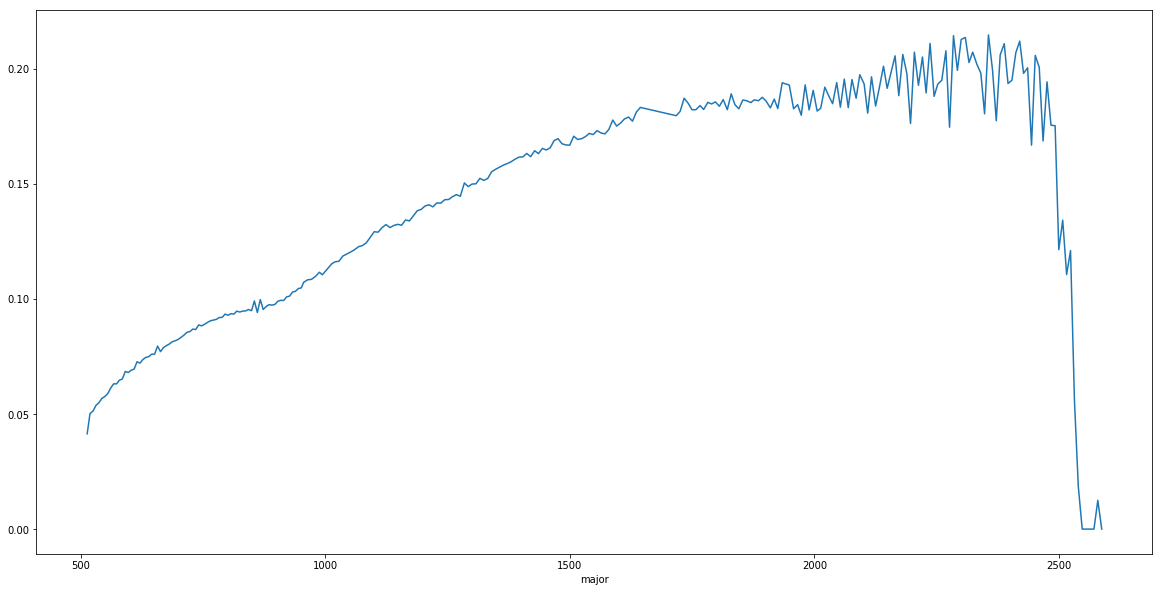

In [13]:
spectrum = s.loc['REF1', 1, s.wavelengths]
spectrum.plot()

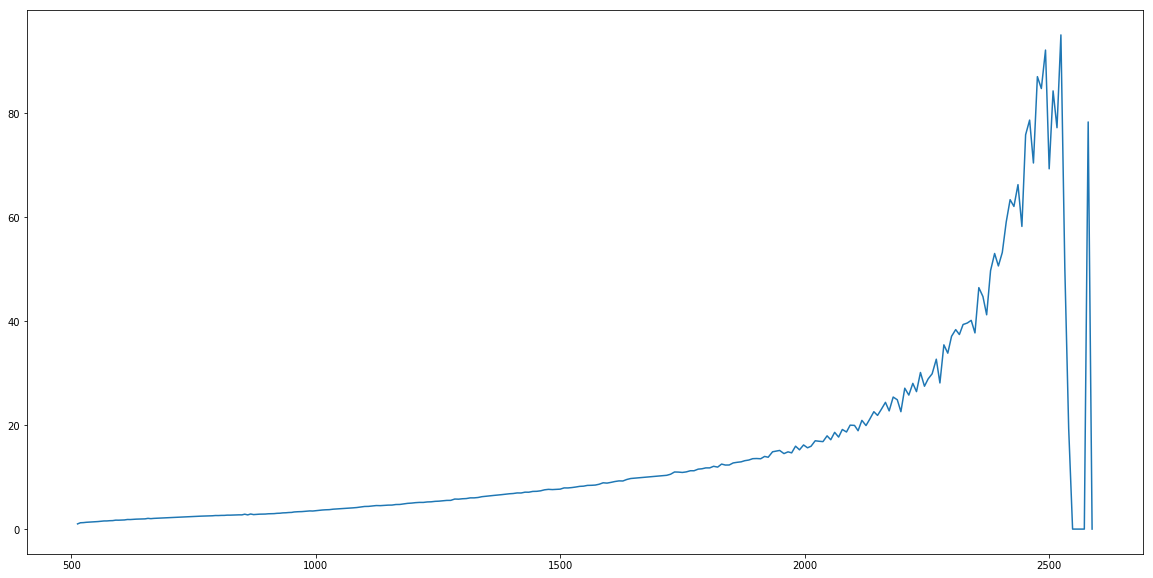

In [14]:
spectrum_corrected = spectrum.linear_correction()
spectrum_corrected.plot()

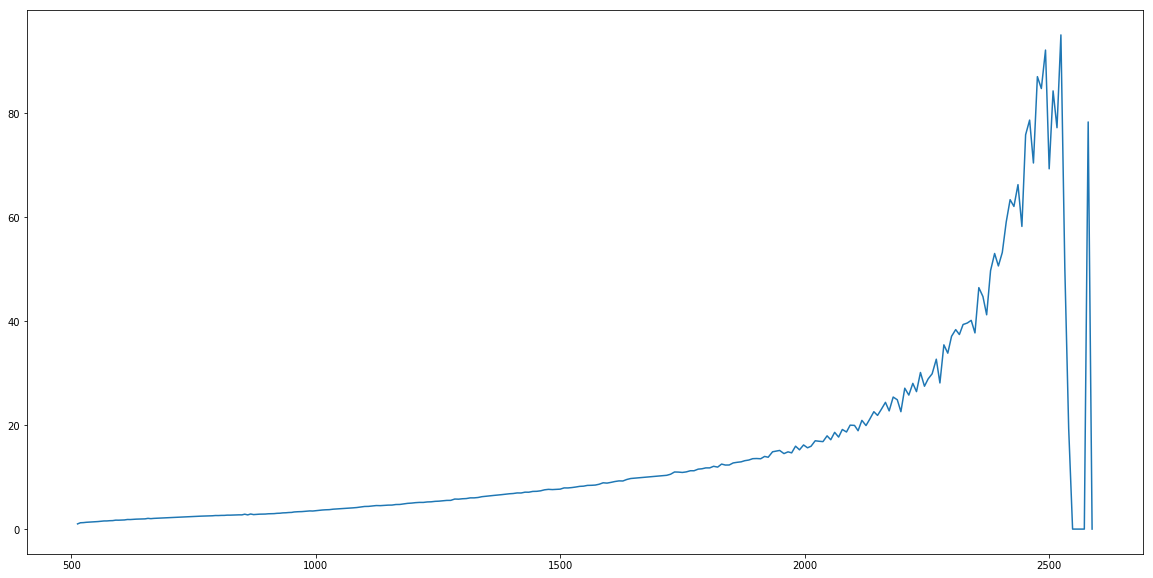

In [15]:
lincorr(spectrum).plot()

In [16]:
# Perform linear continuum correction on a single spectrum
# may be suffering from underflow
ref = s.loc['REF1', :]

ref_corrected = ref.linear_correction()
ref_corrected.head(10)

512.6     518.4     524.7     530.4     536.5     542.8     548.7   \
minor id                                                                       
REF1  0      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
      1      1.0  1.215959  1.246398  1.308323  1.341537  1.392241  1.415935   
      2      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
      3      1.0  1.214590  1.243894  1.303804  1.341145  1.391754  1.419087   
      4      1.0  1.217142  1.246453  1.306370  1.343719  1.394336  1.419087   
      5      1.0  1.215131  1.241935  1.304557  1.339405  1.390127  1.414919   
      6      1.0  1.217689  1.244501  1.304557  1.339405  1.392716  1.417515   
      7      1.0  1.214590  1.241334  1.303804  1.338571  1.391754  1.416498   
      8      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
      9      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

            554.5     560.5     566.7    ...       2516.1      2524.1  \
minor id                                 ...                            
REF1  0   0.000000  0.000000  0.000000   ...     0.000000    0.000000   
      1   1.449556  1.513187  1.564951   ...    77.216698   95.070381   
      2   0.000000  0.000000  0.000000   ...     0.000000    0.000000   
      3   1.451701  1.515905  1.567582   ...    77.150613   92.121886   
      4   1.454298  1.515905  1.564969   ...    81.416328   97.336333   
      5   1.447594  1.511938  1.561104   ...    79.485724   89.950467   
      6   1.452801  1.517160  1.566342   ...    71.079998   97.667620   
      7   1.449105  1.515905  1.567582   ...    81.416328  100.233247   
      8   0.000000  0.000000  0.000000   ...     0.000000    0.000000   
      9   0.000000  0.000000  0.000000   ...     0.000000    0.000000   

             2532.1     2540.0     2548.0  2556.0     2564.0  2572.0  \
minor id                                                               
REF1  0    0.000000   0.000000   0.000000     0.0   0.000000     0.0   
      1   50.217854  19.360509   0.000000     0.0   0.000000     0.0   
      2    0.000000   0.000000   0.000000     0.0   0.000000     0.0   
      3   73.342522   0.000000  17.469858     0.0  21.652922     0.0   
      4   57.349120   0.000000   0.000000     0.0   0.000000     0.0   
      5   32.637664   0.000000   0.000000     0.0   0.000000     0.0   
      6   24.383371   0.000000   0.000000     0.0   0.000000     0.0   
      7   37.002485  20.395039   0.000000     0.0   0.000000     0.0   
      8    0.000000   0.000000   0.000000     0.0   0.000000     0.0   
      9    0.000000   0.000000   0.000000     0.0   0.000000     0.0   

              2579.9  2587.9  
minor id                      
REF1  0     0.000000     0.0  
      1    78.325030     0.0  
      2     0.000000     0.0  
      3   417.832347     0.0  
      4   111.553976     0.0  
      5     0.000000     0.0  
      6   195.221142     0.0  
      7   223.768034     0.0  
      8     0.000000     0.0  
      9     0.000000     0.0  

[10 rows x 269 columns]

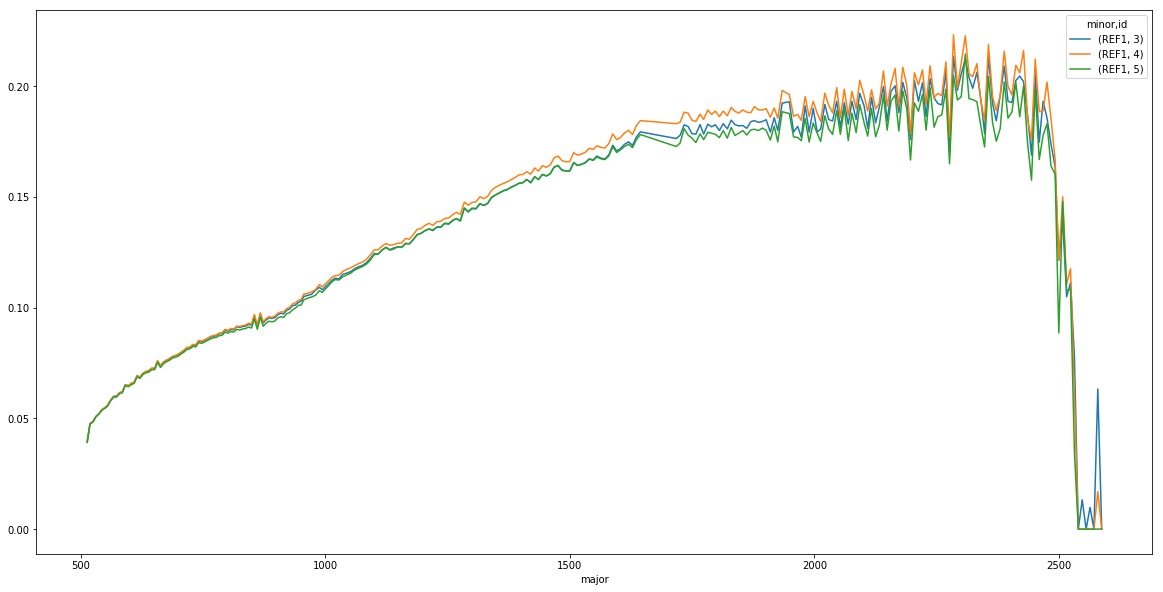

In [27]:
ref.iloc[3:6].plot_spectra()

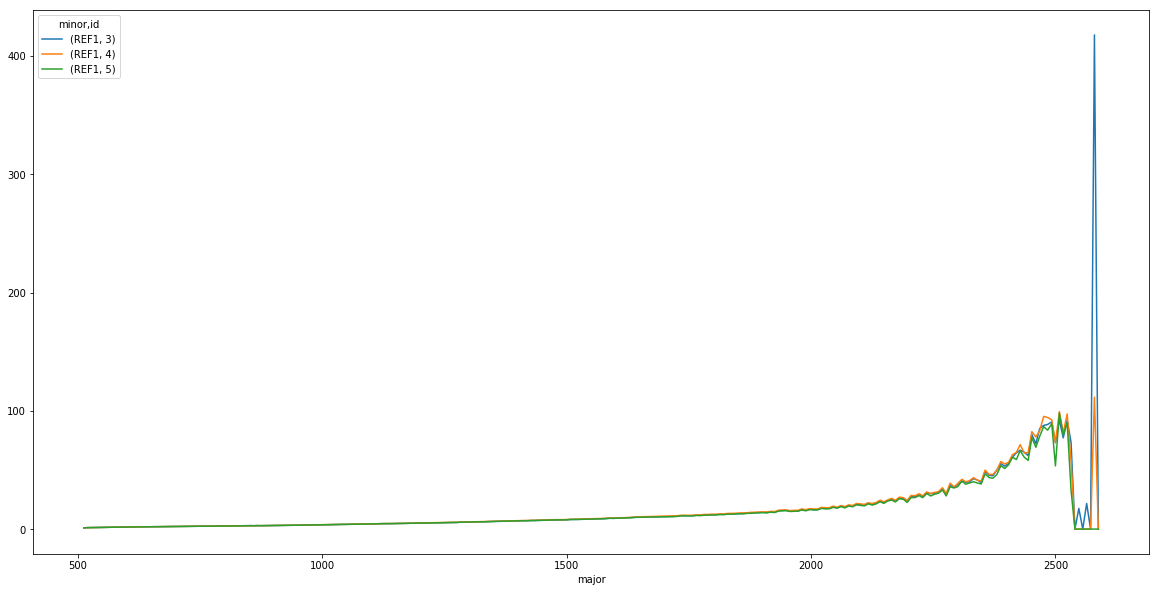

In [26]:
ref_corrected.iloc[3:6].plot_spectra()